In [4]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from scipy.stats import chi2_contingency

from sklearn.linear_model import LinearRegression


import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.dummy import DummyRegressor

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.svm import LinearSVC

from sklearn.feature_selection import SelectFromModel

df = pd.read_csv('Case_study_CarPrice_Assignment.csv')



# Tìm hiểu bộ dữ liệu

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#  Xác định kích thước của Dataframe
dim = df.shape
print(f'Số cột: {dim[1]} \n\nSố hàng: {dim[0]}')

Số cột: 26 

Số hàng: 205


In [7]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [8]:
# Thông số thống kê mô tả

df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


# Tiền xử lý dữ liệu

--------------------------------------------------------------------------------------------------------------------
### 1. Giá trị khuyết thiếu

In [9]:
# Kiểm tra giá trị khuyết thiếu
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

- Giá trị khuyết thiếu: Không có giá trị khuyết thiếu

-------------------------------------------------------------------------------------------------------------------
### 2. Xử lý dữ liệu của thuộc tính 'CarName'

In [10]:
# Drop thuộc tính không ảnh hưởng giá xe

df.drop(columns='car_ID',inplace=True)

In [11]:
# Xác định những giá trị duy nhất

df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [97]:
# Phấn tách thành 2 cột hãng xe và tên xe 

df[['brand','car_name']] = df['CarName'].str.split(' ',n=1,expand=True)

df.head()


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,car_name
0,5,alfa-romero giulia,1,0,1,0,2,0,0.058309,0.413433,...,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,13495.0,alfa-romero,giulia
1,5,alfa-romero stelvio,1,0,1,0,2,0,0.058309,0.413433,...,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,16500.0,alfa-romero,stelvio
2,3,alfa-romero Quadrifoglio,1,0,1,2,2,0,0.230321,0.449254,...,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,16500.0,alfa-romero,Quadrifoglio
3,4,audi 100 ls,1,0,0,3,1,0,0.384840,0.529851,...,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,13950.0,audi,100 ls
4,4,audi 100ls,1,0,0,3,0,0,0.373178,0.529851,...,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,17450.0,audi,100ls


In [10]:
# Sửa lại tên hãng bị sai 

df.replace({'brand':{'toyouta':'toyota','maxda':'mazda','Nissan':'nissan','porcshce':'porsche','vokswagen':'volkswagen','vw':'volkswagen'}},inplace=True)
df['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
#  drop cột 'car_name'
 
df.drop(columns='car_name',inplace= True)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


------------------------------------------------------------------------------------------------------------------
### 3. Xem xét các thuộc tính, đưa về đúng kiểu

In [14]:
#  Xem xét các thuộc tính

def feature(agr):
    return df[agr].unique()

lst = df.columns.to_list()

for i in range(1,len(lst)):
    print(f'{lst[i]}:{feature(lst[i])}')

CarName:['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick ope

In [13]:
#  Xác định kiểu dữ liệu của tt symboling

df['symboling'].dtype
                          

dtype('int64')

- TT symboling là dạng ordinal, vì vậy điều chinh nó về dạng category


In [15]:
#  Đưa symboling về kiểu category

df['symboling'] = df['symboling'].astype('category')

df['symboling'].dtype

CategoricalDtype(categories=[-2, -1, 0, 1, 2, 3], ordered=False)

### Xử lý ngoại lai

<AxesSubplot:xlabel='price'>

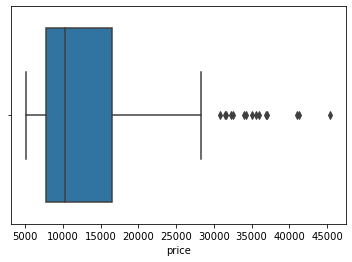

In [94]:
#  Vẽ boxplot để xác định ngoại lai

sns.boxplot( x = df["price"])


In [102]:
# Xử lý ngoại lai:

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1
IQR
df[(df['price']<(Q1-1.5*IQR))|(df['price'] > (Q3+1.5*IQR))]['brand'].to_list()


['bmw',
 'bmw',
 'bmw',
 'jaguar',
 'jaguar',
 'jaguar',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'porcshce',
 'porsche',
 'porsche',
 'porsche']

- Nhận xét: Giá trị ngoại lai đều thuộc dòng xe hạng sang, đắt tiền vì vậy lựa chọn không xóa giá trị ngoại lai

------------------------------------------------------------------------------------------------------------------
# Phân tích dữ liệu 

In [16]:
# Groupby các hãng xe 
df_brand_body = pd.crosstab(df['brand'],df['carbody']).reset_index()


df_brand_body.head()

carbody,brand,convertible,hardtop,hatchback,sedan,wagon
0,Nissan,0,0,0,1,0
1,alfa-romero,2,0,1,0,0
2,audi,0,0,1,5,1
3,bmw,0,0,0,8,0
4,buick,1,2,0,4,1


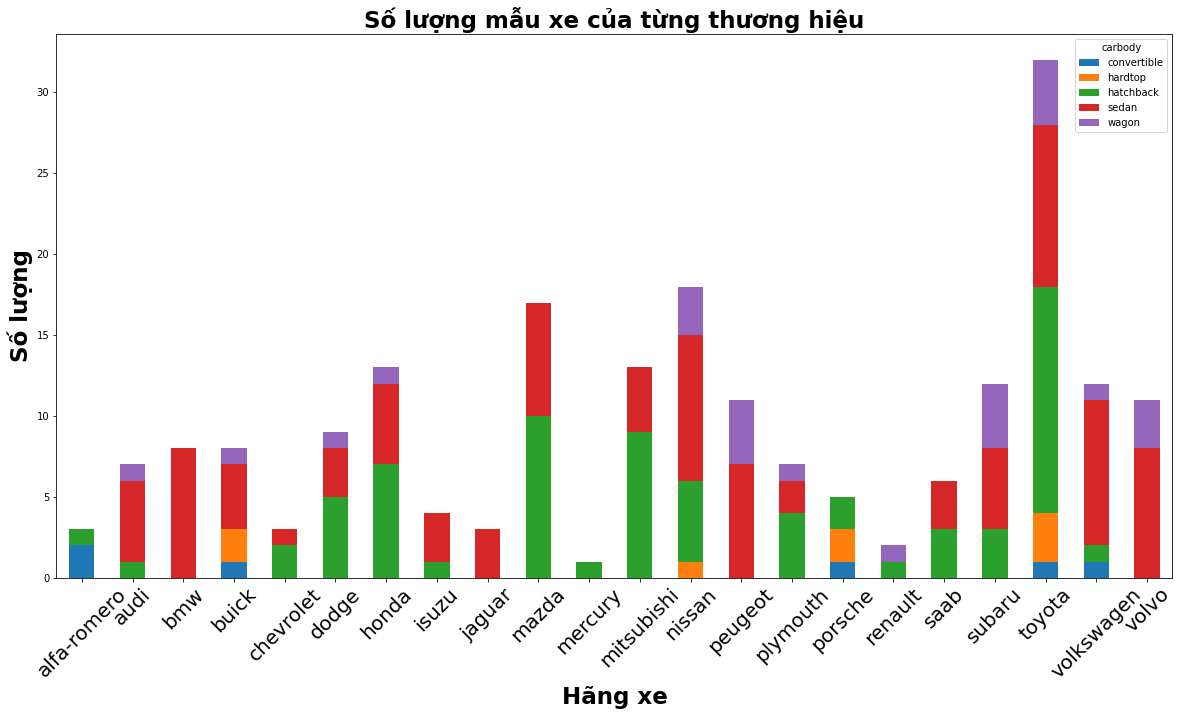

In [202]:
#  Đồ thị số lượng mẫu xe của từng thương hiệu
df_brand_body.plot(x='brand', kind='bar', stacked=True,figsize= (20,10))
plt.xticks(rotation = 45,fontsize = 20)
plt.xlabel('Hãng xe',fontweight = 'bold',fontsize = 23)
plt.ylabel('Số lượng',fontweight = 'bold',fontsize = 23)

plt.title('Số lượng mẫu xe của từng thương hiệu',fontweight = 'bold',fontsize = 23)

plt.show()

Nhận xét: Hầu như, mẫu Sedan và hatchback chiếm tỷ trọng cao trong số lượng xe của từng nhà sản xuất 

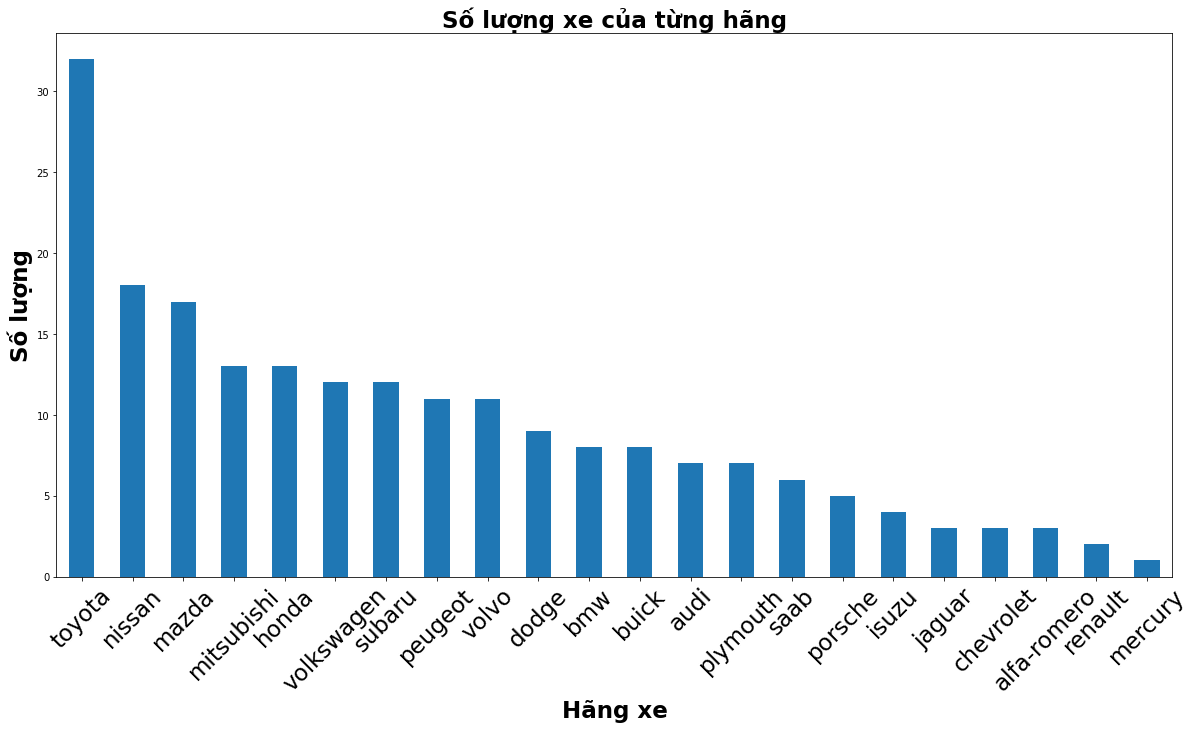

In [17]:
# Trực quan hóa 
plt.figure(figsize=(20,10))
df['brand'].value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation = 45,fontsize = 23)
plt.xlabel('Hãng xe',fontweight = 'bold',fontsize = 23)
plt.ylabel('Số lượng',fontweight = 'bold',fontsize = 23)

plt.title('Số lượng xe của từng hãng',fontweight = 'bold',fontsize = 23)
plt.show()

+ Nhận xét: Từ bộ dữ liệu thu thập được, ta thấy số xe của toyota là nhiều nhất

In [20]:
df_drop_car_name = df.drop(columns=['CarName'])

# lấy danh sách thuộc tính định lương
col_number = list(df_drop_car_name.select_dtypes(include='number'))

#  Lấy danh sách thuộc tính định tính

col_category = list(df_drop_car_name.select_dtypes(include=['category','object']))

col_category

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'brand']

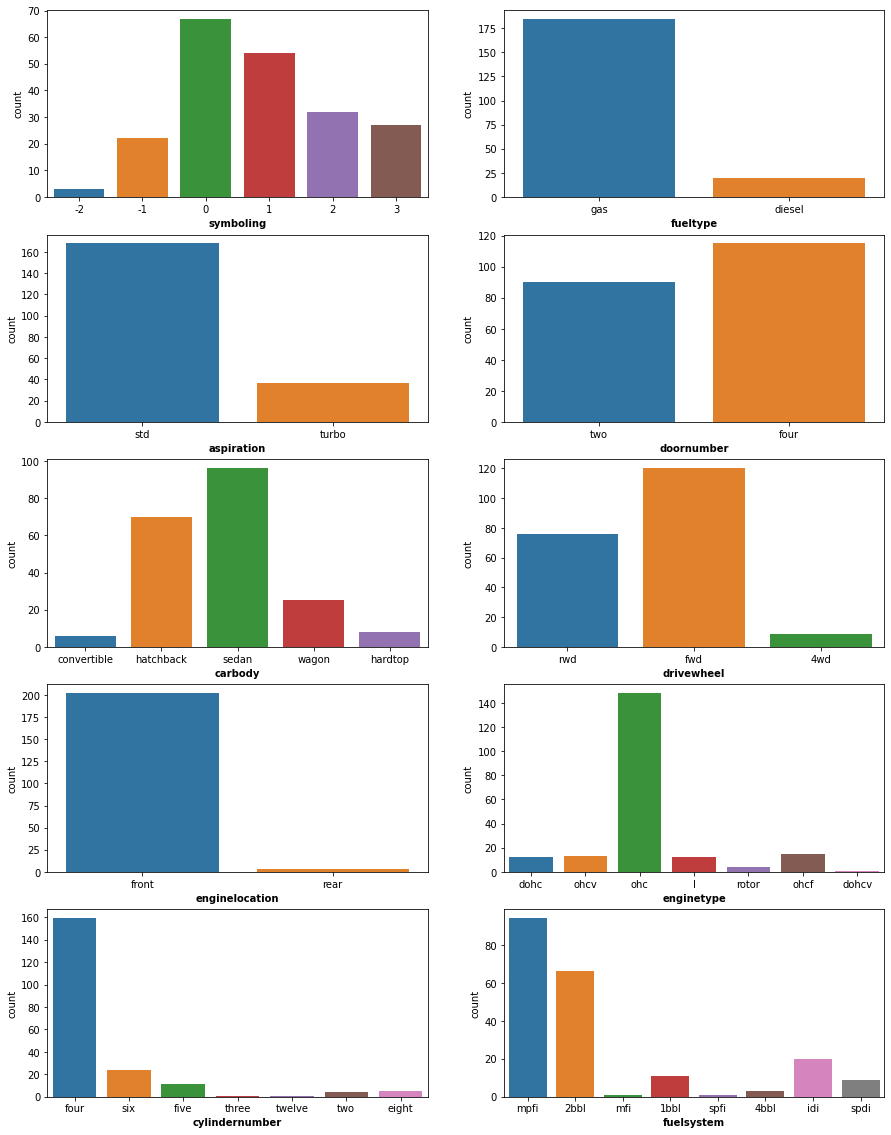

In [19]:
# Trực quan hóa 10 thuộc tính category

plt.figure(figsize=(15,20))
for i,j in enumerate(col_category[:-1],start=1):
    plt.subplot(5,2,i)
    sns.countplot(x = j,data = df_drop_car_name)
    plt.xlabel(j,fontweight="bold")
plt.show()
   


Nhận xét:
+ Số lượng xe chạy bằng xăng nhiều hơn chạy bằng dầu;
+ Số lượng xe có độ rủi ro 0-3 chiếm đa số;
+ Loại hút: đa số xe sử dụng loại chuẩn;
+ Số lượng xe 4 cửa cao hơn một chút so với xe 2 cửa;
+ Dòng xe sedan và hatchback là phổ biến nhất;
+ Dẫn động bánh trước là mẫu xuất hiện nhiều nhất, ngược lại dẫn động 4 bánh với số lượng rất nhỏ;
+ Động cơ phía trước vẫn là thiết kế phổ biến nhất, trong khi động cơ phía sau thì rất hiếm;
+ Động cơ ohc là loại thiết kế phổ biến nhất;
+ Động cơ 4 xilanh là động cơ phổ biến nhất;
+ Các hãng xe chủ yếu sử dụng hệ thống nhiên liệu mpf1, 2bbl.


### Xử lý ngoại lai price:

In [17]:
# Chia dữ liệu thành 4 khoảng theo quantile

q1, q2, q3  = df.price.quantile(0.25), df.price.quantile(0.5), df.price.quantile(0.75)

condition = [df.price < q1, df.price <q2,df.price< q3]

values = [1,2,3]

df_ordial_pr = df.copy()
df_ordial_pr['price_ordinal'] = np.select(condition, values,default=4)

df_ordial_pr.head()


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,price_ordinal
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,3
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,3
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,3
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,3
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,4


<Figure size 1440x720 with 0 Axes>

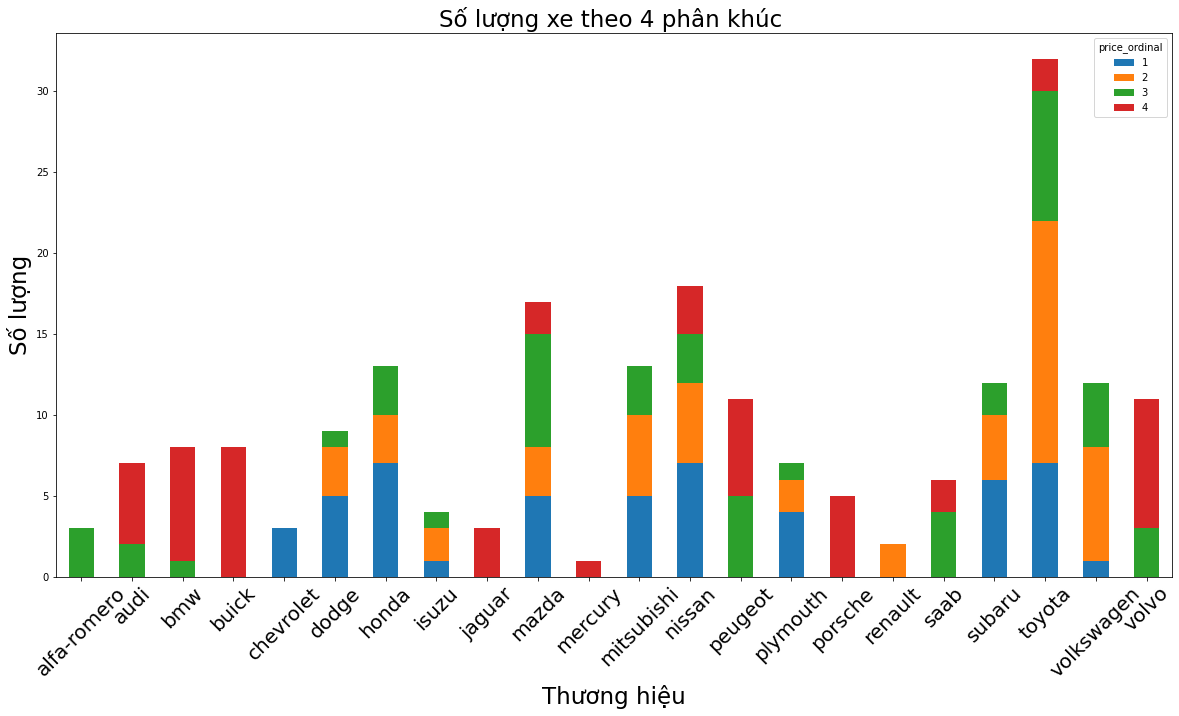

In [21]:

# Lập bảng contigency giữa brand và price_ordinal

df_brand_ordinal_price = pd.crosstab(df_ordial_pr['brand'],df_ordial_pr['price_ordinal']).reset_index()

# Biểu đồ số lượng xe theo từng phân khúc của từng hãng 

plt.figure(figsize=(20,10))

df_brand_ordinal_price.plot(x='brand', kind='bar', stacked=True,figsize= (20,10))

plt.xticks(rotation = 45,fontsize = 20)

plt.title('Số lượng xe theo 4 phân khúc ', fontsize = 23)

plt.xlabel('Thương hiệu', fontsize = 23)
plt.ylabel('Số lượng', fontsize = 23)
plt.show()

In [18]:
# Groupy by lấy giá trung bình của từng hãng xe
df_mean_price_brand  = df.groupby(['brand'])['price'].mean().sort_values().reset_index()

df_mean_price_brand.head()

,brand,price
0,Nissan,5499.000000
1,maxda,5645.000000
2,chevrolet,6007.000000
3,vokswagen,7775.000000
4,dodge,7875.444444


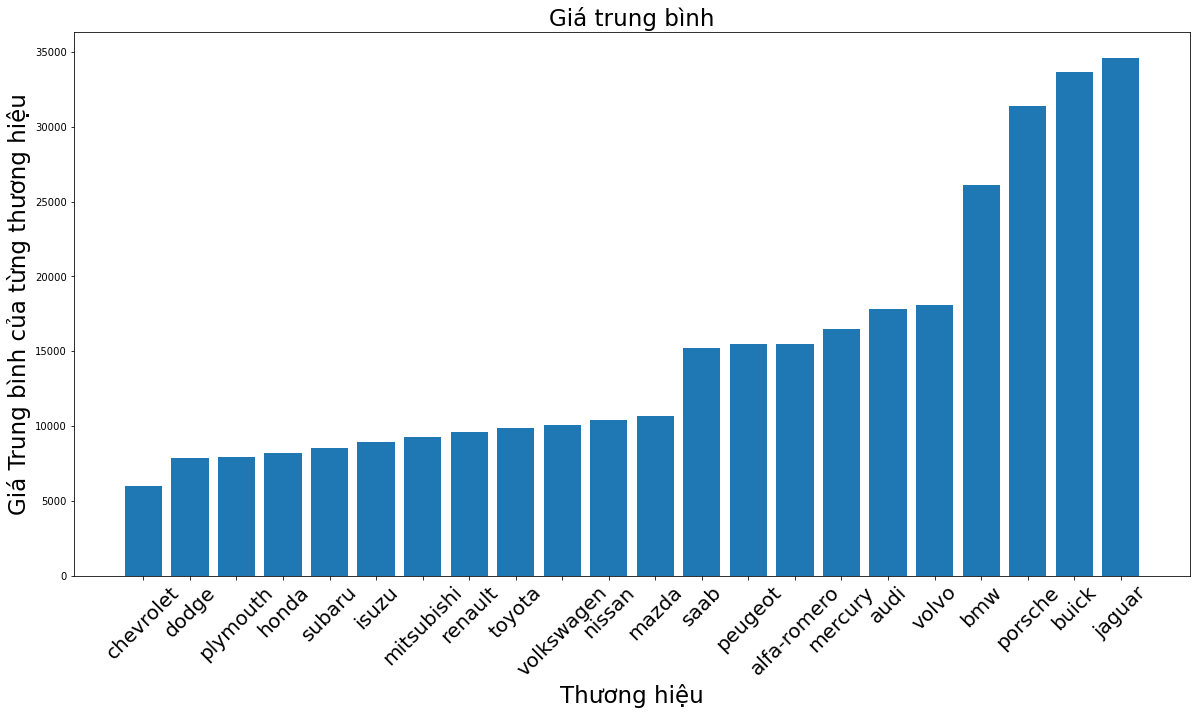

In [23]:
# Biểu đồ giá trung bình của từng hãng xe
plt.figure(figsize=(20,10))

plt.bar(df_mean_price_brand['brand'],df_mean_price_brand['price'])

plt.xticks(rotation = 45,fontsize = 20)

plt.title('Giá trung bình', fontsize = 23)

plt.xlabel('Thương hiệu', fontsize = 23)
plt.ylabel('Giá Trung bình của từng thương hiệu', fontsize = 23)
plt.show()

Nhận xét: Giá trung bình cao nhất rơi vào dòng xe hạng sang

<Figure size 1440x720 with 0 Axes>

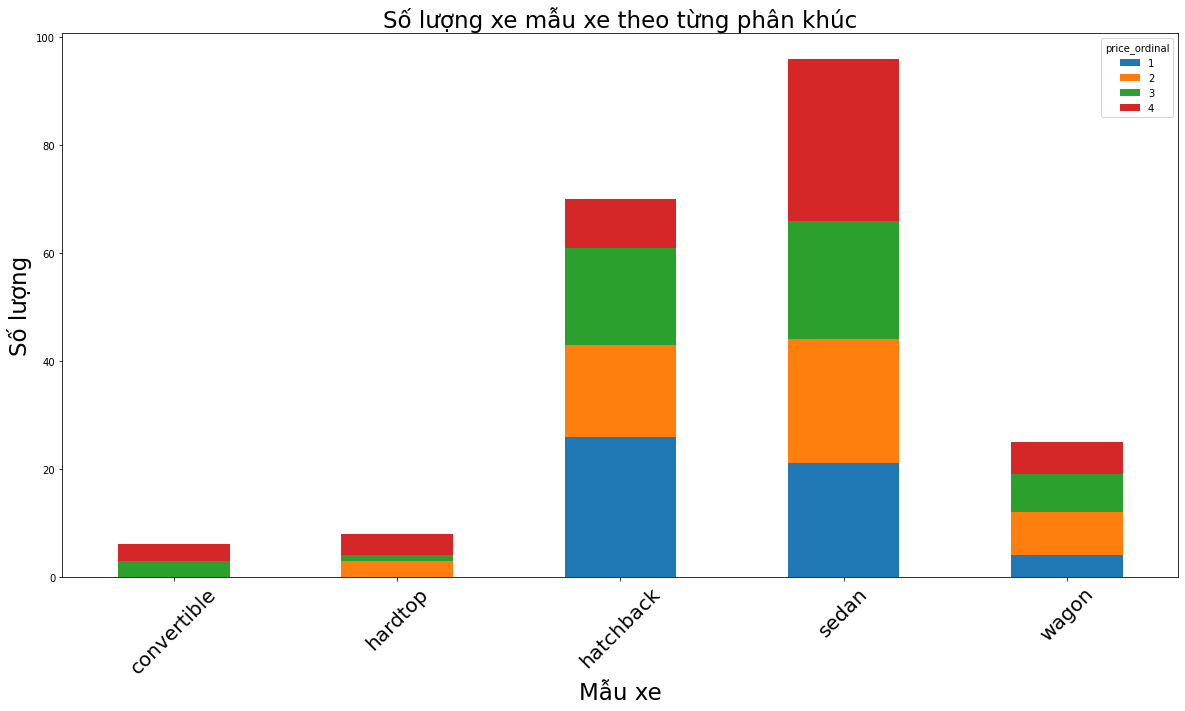

In [24]:
#  Lập bảng contigency giữa carbody và Price_ordinal

df_carbody_ordinal_price = pd.crosstab(df_ordial_pr['carbody'],df_ordial_pr['price_ordinal']).reset_index()

# Biểu đồ giá trung bình của từng mẫu xe

df_carbody_ordinal_price
plt.figure(figsize=(20,10))

df_carbody_ordinal_price.plot(x='carbody', kind='bar', stacked=True,figsize= (20,10))

plt.xticks(rotation = 45,fontsize = 20)

plt.title('Số lượng xe mẫu xe theo từng phân khúc', fontsize = 23)

plt.xlabel('Mẫu xe', fontsize = 23)
plt.ylabel('Số lượng', fontsize = 23)
plt.show()

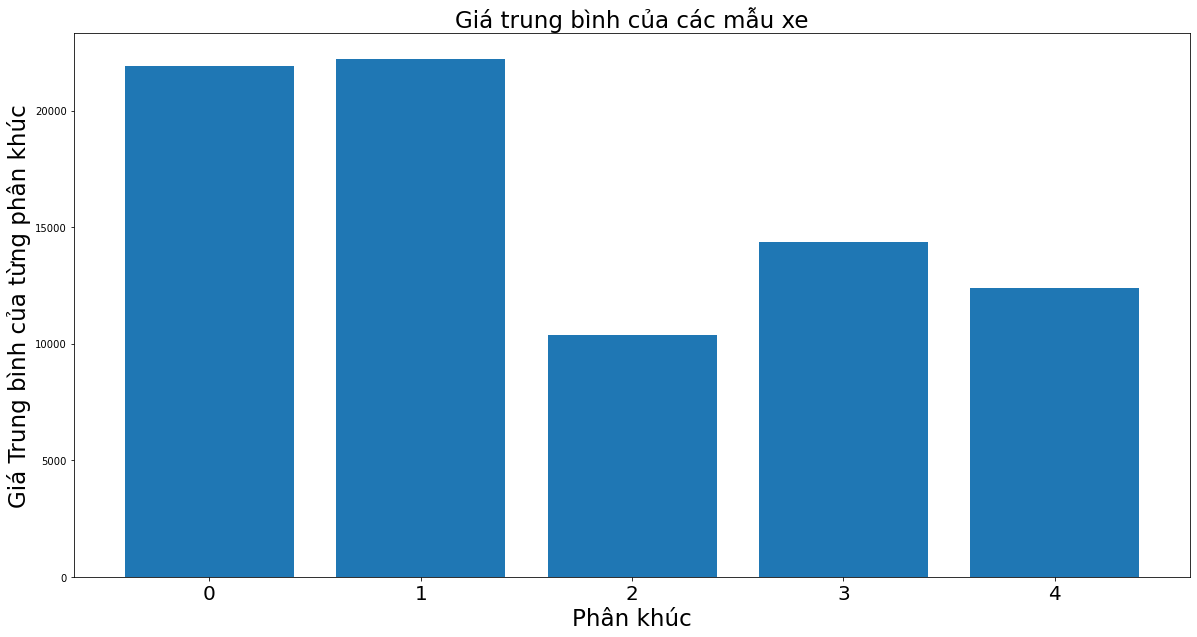

In [472]:
# Groupy by lấy giá trung bình của từng mẫu xe


df_mean_price_brand  = df.groupby(['carbody'])['price'].mean().sort_values().reset_index()

df_mean_price_brand.head()

plt.figure(figsize=(20,10))

plt.bar(df_mean_price_brand['carbody'],df_mean_price_brand['price'])

plt.xticks(fontsize = 20)

plt.title('Giá trung bình của các mẫu xe', fontsize = 23)

plt.xlabel('Phân khúc', fontsize = 23)
plt.ylabel('Giá Trung bình của từng phân khúc', fontsize = 23)
plt.show()


Nhận xét: mẫu xe convertinle và hardtop có giá trị trung bình lớn nhất, thấp nhất là mẫu hatchback 

### Kiểm định chi-square giữa price_ordinal và các thuộc tính định tính

Phát biểu giả thuyết:
+ H0: Price không phụ thuộc vào thuộc tính được chỉ định
+ H1: Price phụ thuộc vào thuộc tính được chỉ định
+lấy alpha = 0.01

In [21]:
#  So sánh P_value với alpha để xác định price với các biến định tính có phụ thuộc không

def chi_sq(agr):
    contigency= pd.crosstab(df_ordial_pr['price_ordinal'], df_ordial_pr[agr]).reset_index()
    c, p, dof, expected = chi2_contingency(contigency)
    return p
lst_dependent_category = list()
for i in col_category:
    if chi_sq(i) < 0.01: lst_dependent_category.append(i)
lst_dependent_category

['symboling',
 'aspiration',
 'drivewheel',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'brand']

Nhận xét: Thuộc tính symboling', 'aspiration', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand' có quan hệ đến price

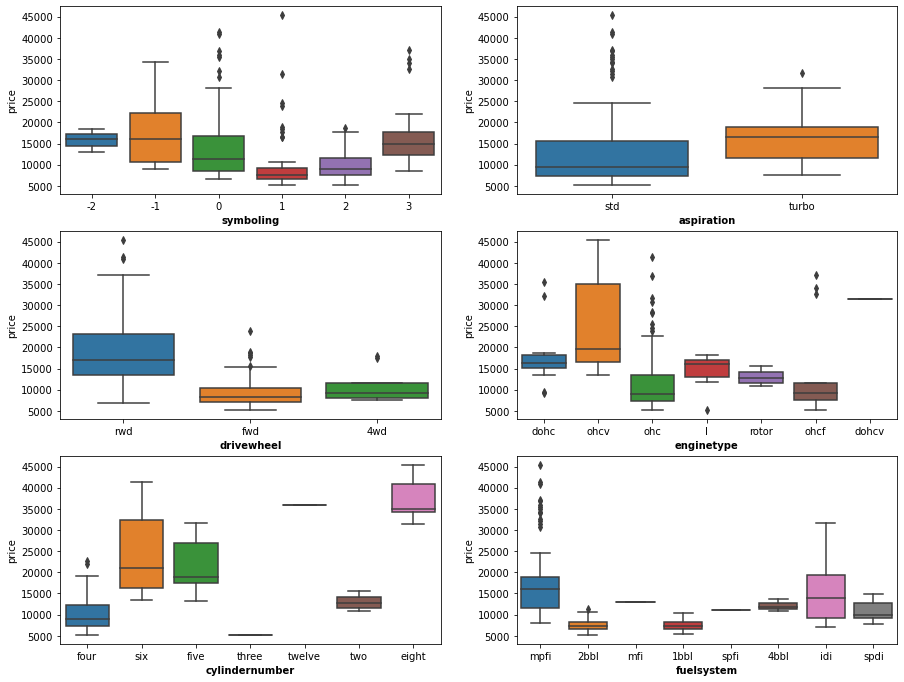

In [468]:
# Vẽ biểu đồ violinplot 
plt.figure(figsize=(15,20))
for i,col in enumerate(lst_dependent_category[:-1],1):
    plt.subplot(5,2,i)
    sns.boxplot(data=df_ordial_pr, x=col, y="price")
    plt.xlabel(col, fontweight="bold")
plt.show()

Nhận xét: Ở từng thuộc tính, giá trung bình của từng thông số thiết kế đều có sự khác biết, nhận thấy thuộc tính drivewheel,fluelsytem có thể tác động giá xe

In [ ]:
stats.ttest_ind(df[“aspiration”], df[“old”], equal_var=False)

<Figure size 1080x1440 with 0 Axes>

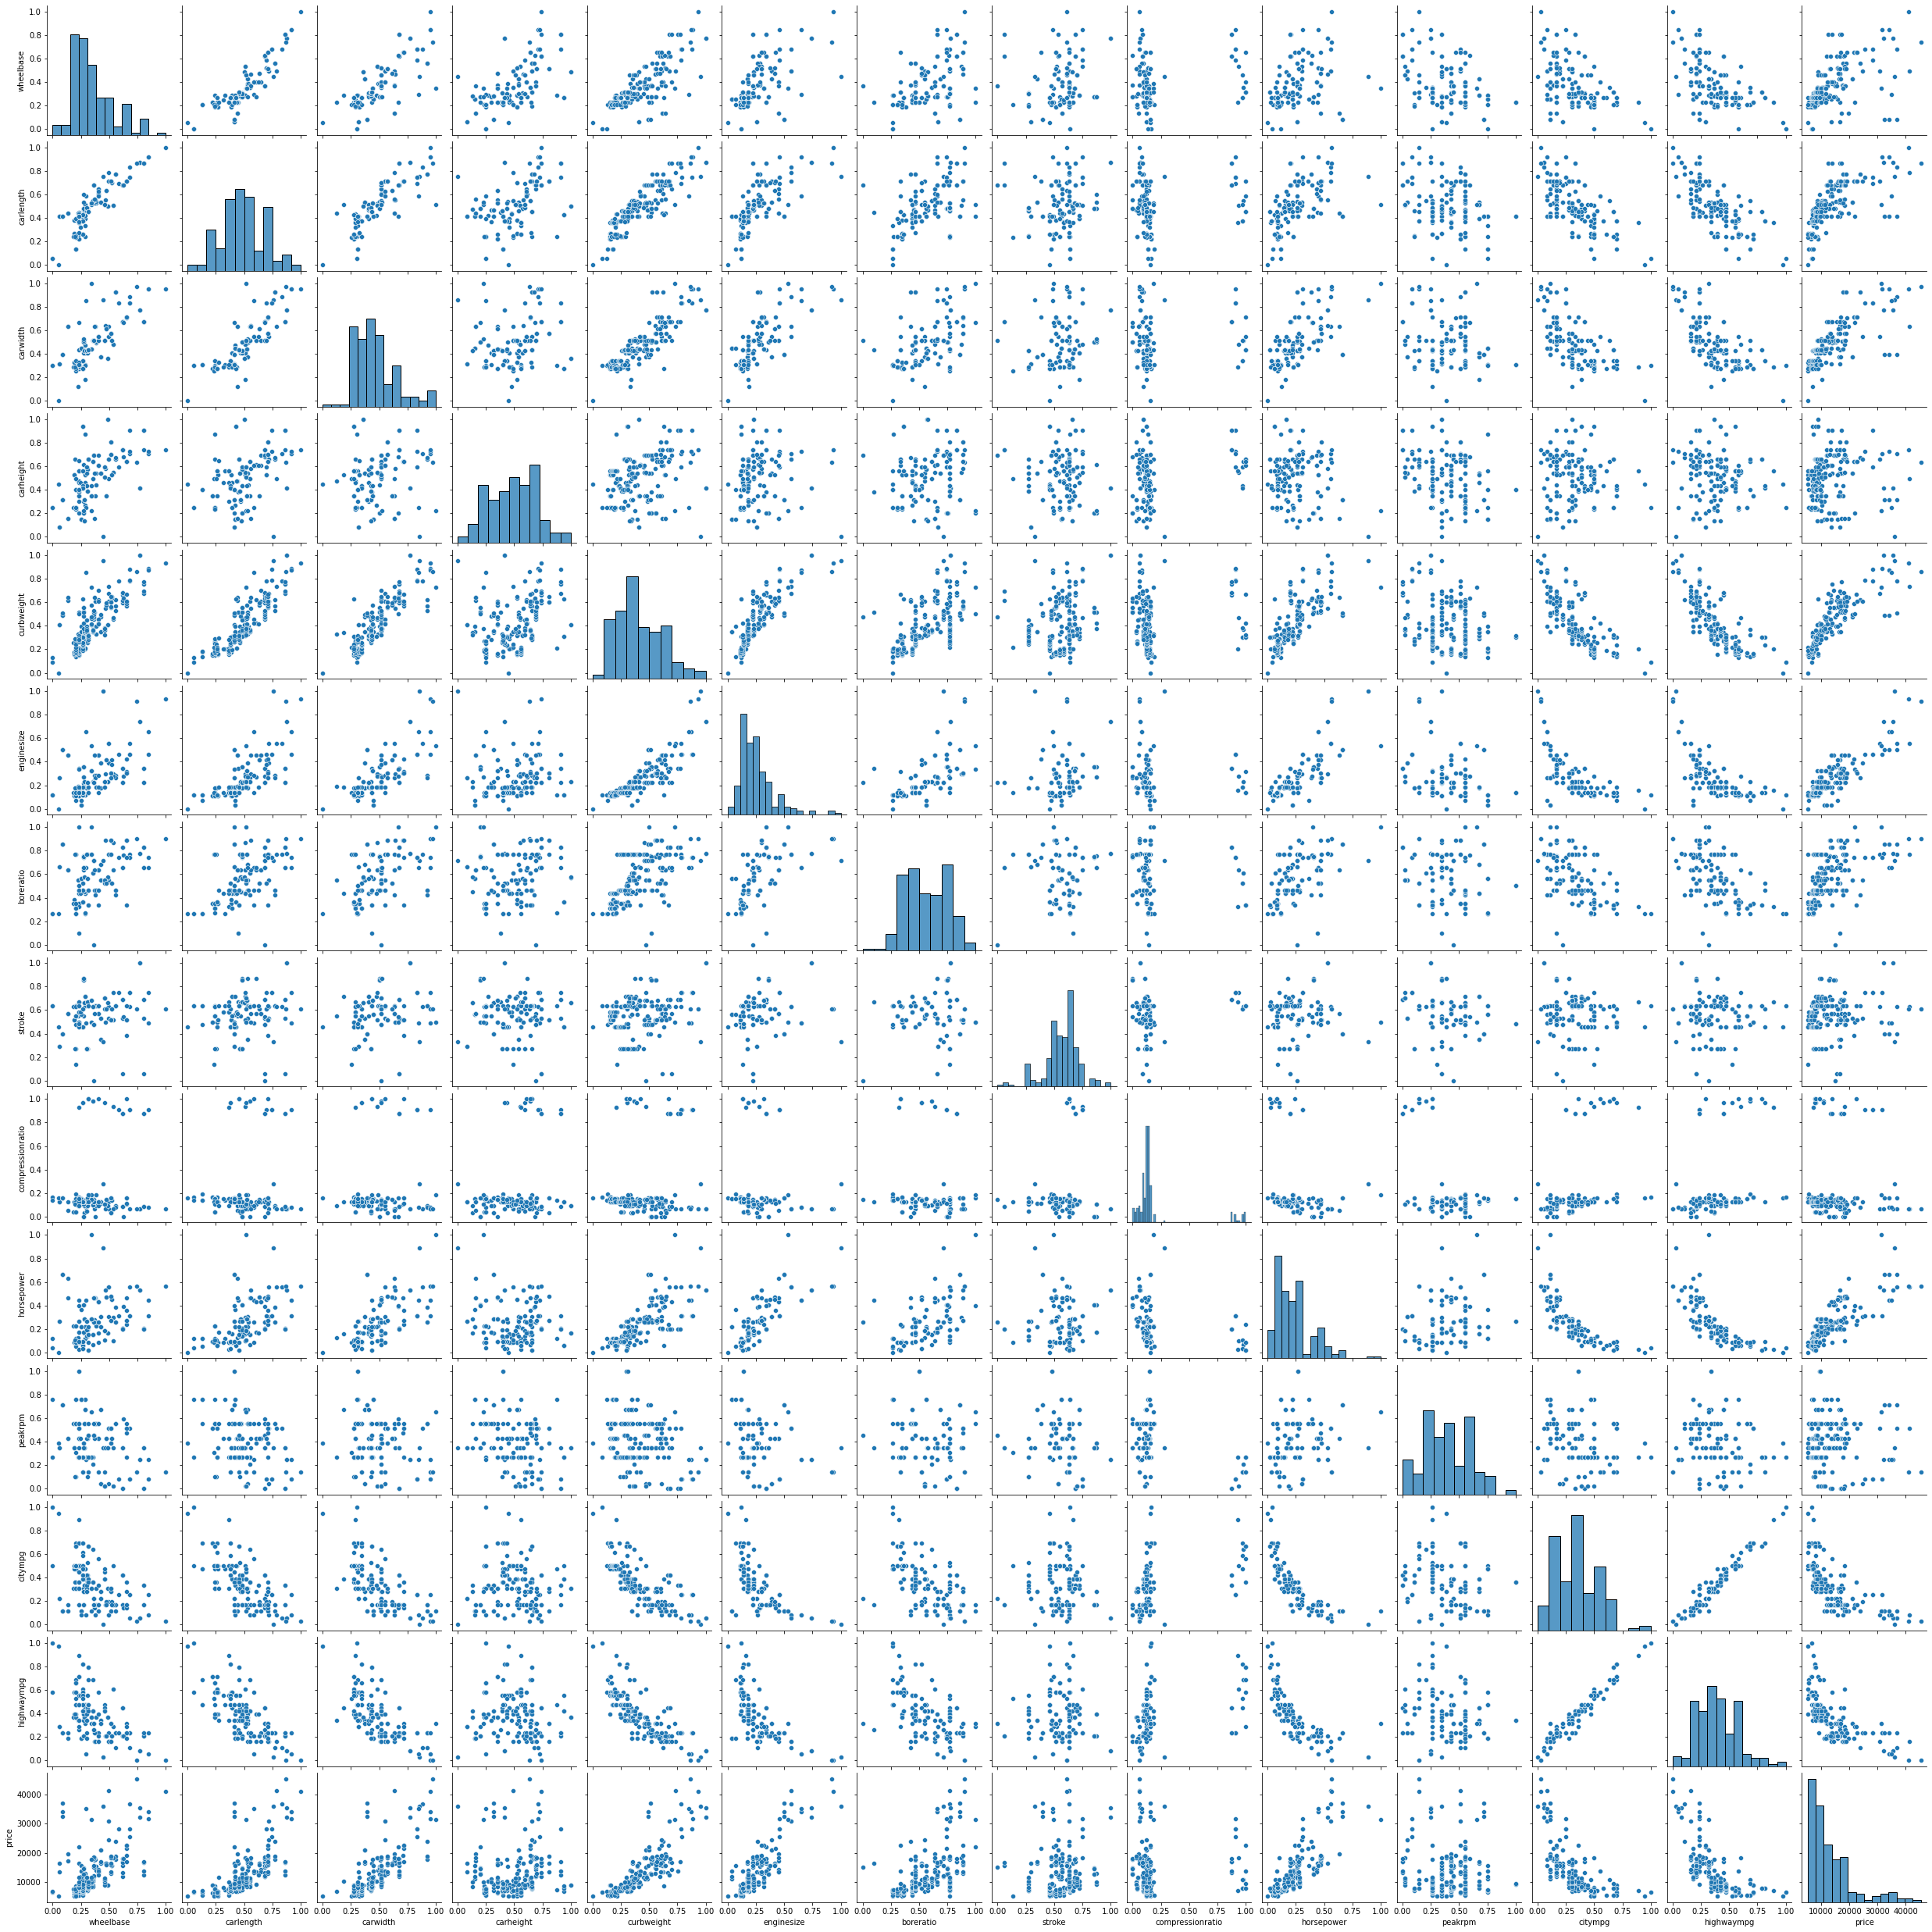

In [469]:
# Vẽ biếu đồ pairlot để thấy được mối quan hệ giữa các thuộc tính định lượng
plt.figure(figsize=(15,20))

sns.pairplot(df[col_number[:]])

plt.show()


Nhận xét: 
+ Price có biểu đồ phân phối lệch trái - lệch tích cực.
+ Nhận thấy có một số thuộc tính có mối quan hệ tuyến tính với price;


### Kiểm định tương quan giữa các thuộc tính định lượng

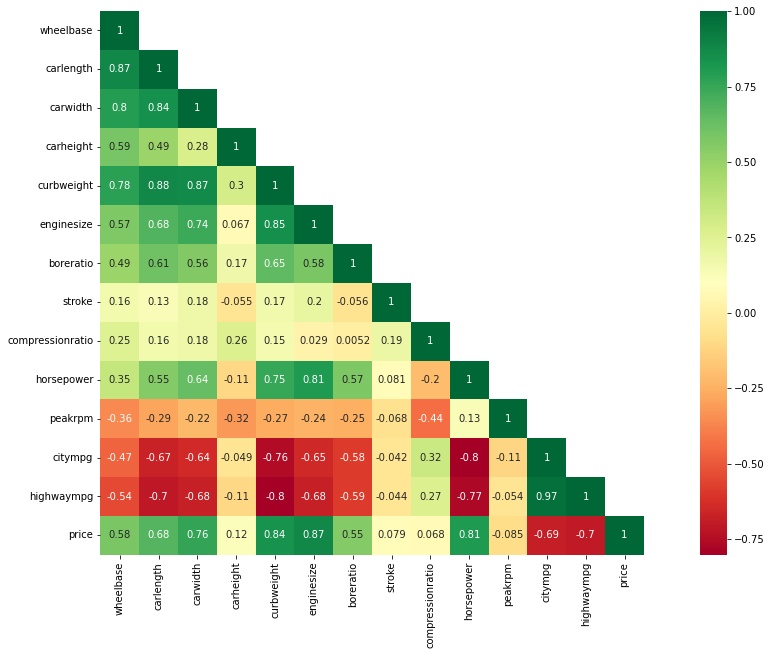

In [227]:
#  Vẽ heatmap thể hiện mức độ tương quan giữa 'price' với các biến định lượng :
plt.figure(figsize=(20,10))

sns.heatmap(df[col_number].corr(), annot = True,cmap = 'RdYlGn', square=True, mask =np.triu(df[col_number].corr() ,k=1))
plt.show()


Nhận xét: 
+ Thuộc tính horsepower, curbweight, enginesize, carlength,carwidth có mối tương quan thuận với price ở mức tốt;
+ Thuộc tính highwaympg có mối tương quan nghịch với price ở mức tốt.

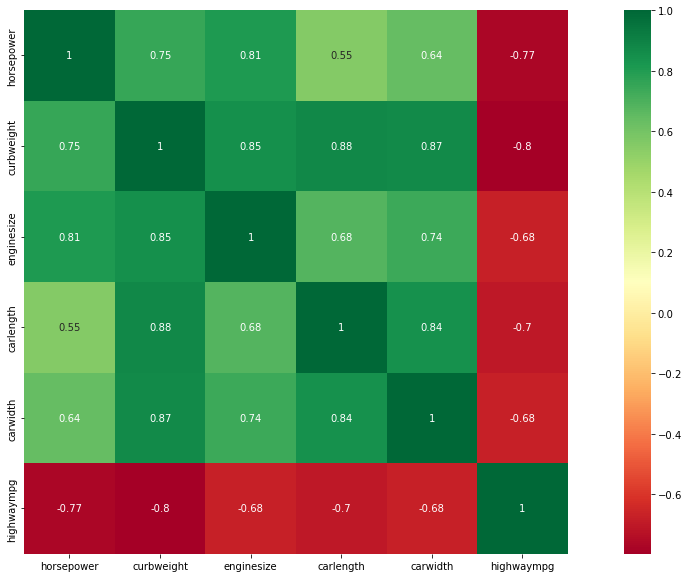

In [212]:
#  Heatmap thể hiện mức độ tương quan giữa các biến định lượng (có mối tương quan tối với price) với nhau

df_corr_price = df.filter(['horsepower','curbweight','enginesize','carlength','carwidth','highwaympg'])

plt.figure(figsize=(20,10))

sns.heatmap(df_corr_price.corr(),annot = True,cmap = 'RdYlGn', square=True, mask =np.triu(df_corr_price.corr() ,k=6))

plt.show()


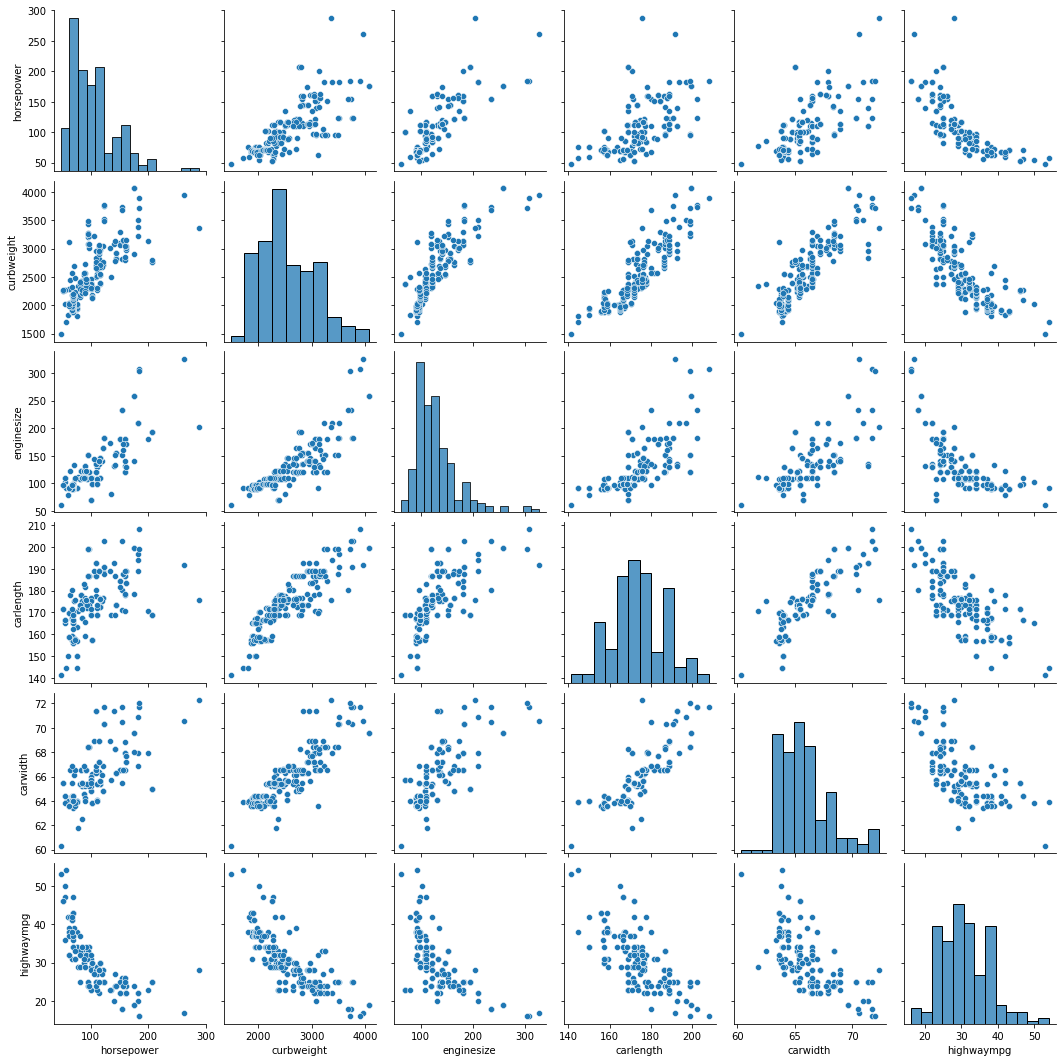

In [33]:
# Vẽ biếu đồ pairlot để thấy được mối quan hệ giữa các thuộc tính định lượng được chọn 

sns.pairplot(df_corr_price)
plt.show()


Nhận xét: Các thuộc tính có mối quan hệ tương quan khá tốt với nhau

## Xây dựng mô hình

### Chuẩn bị dữ liệu

In [22]:
#  Chuẩn hóa dữ liệu bằng Label encoder
encoder = LabelEncoder() 
encoded_data = df

encoded_data[col_category[:]] = encoded_data[col_category[:]].apply(lambda col: encoder.fit_transform(col))

encoded_data.head()



,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,5,alfa-romero giulia,1,0,1,0,2,0,88.6,168.8,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,5,alfa-romero stelvio,1,0,1,0,2,0,88.6,168.8,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,171.2,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,audi 100 ls,1,0,0,3,1,0,99.8,176.6,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,4,audi 100ls,1,0,0,3,0,0,99.4,176.6,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,2


In [73]:
# Scale dữ liệu Min Max Scaler
scaler = MinMaxScaler()

data_scaler = encoded_data

data_scaler[col_number[:-1]] = scaler.fit_transform(data_scaler[col_number[:-1]])

data_scaler.head()
data_scaler.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'brand'],
      dtype='object')

## Xây dụng mô hình 

### 1.Xây dựng mô hình bằng lựa chọn các feature có mối quan hệ với price

In [82]:
#  tập hợp các thuộc tính có tương quan với price

feature = ('horsepower','curbweight','enginesize','carlength','carwidth','highwaympg','drivewheel','fuelsystem')
len(feature)

8

In [89]:
#  Tạo mảng cho y

y= data_scaler['price'].values

y = y.reshape(-1,1)

# Tạo mảng cho X

X= data_scaler.filter(feature)

In [90]:
#  Chia dữ liệu train và test theo tỷ lệ 3:7

X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

#  Huấn luện mô hình 

LR= LinearRegression()

LR.fit(X_train,y_train)

print("Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:")
print("Intercept =", LR.intercept_)
print("Coefficients:", LR.coef_)

Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:
Intercept = [1200.18675729]
Coefficients: [[ 8362.63496778  2151.88900278 21746.02977543 -2384.70707917
  10882.87436423 -4545.17360074  1367.33915565   -66.42241042]]


In [91]:
#  Đánh giá mô hình

y_prediction = LR.predict(X_test)

score=r2_score(y_test,y_prediction)
print('R2-score is ',score)
print('Mean_sqrd_error is:',mean_squared_error(y_test,y_prediction))
print('Root_mean_squared error of is:',np.sqrt(mean_squared_error(y_test,y_prediction)))

R2-score is  0.7737064166139053
Mean_sqrd_error is: 15678610.308624858
Root_mean_squared error of is: 3959.6224957216386


### 2.Xây dựng mô hình sử dụng ExtraTreesClassifier để lựa chọn feature

In [31]:
# Tạo mảng cho y

y= data_scaler['price'].values

y = y.reshape(-1,1)

# Tạo mảng cho X

X= data_scaler.filter(col_category[:-1]+col_number[:-1]).values


In [459]:
# Kiểm tra chiều ma trận

X.shape

(205, 23)

In [33]:
#  Lựa chọn feature 

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, df_ordial_pr['price_ordinal'])

#clf.feature_importances_

model = SelectFromModel(clf, prefit=True)

X_new = model.transform(X)

X_new.shape

(205, 9)

In [76]:
#  Xác định thuộc tính định lượng được chọn

lst_X_Row1_num = list(X_new[0][2:])

lst_feature = list()


for i in lst_X_Row1_num:

    for j in col_number[:-1]: 
    
        if i == data_scaler[j][0]: lst_feature.append(j)

lst_feature

['carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'horsepower',
 'highwaympg']

In [465]:
#  Chia dữ liệu train và test theo tỷ lệ 3:7

X_train, X_test,y_train, y_test= train_test_split(X_new,y,test_size=0.3,random_state=42)

#  Huấn luện mô hình 

LR= LinearRegression()

LR.fit(X_train,y_train)

print("Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:\n")

print(f"Intercept: {LR.intercept_}\n")

print("Coefficients:", LR.coef_)

Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:

Intercept: [1165.91016266]

Coefficients: [[ 1422.03631076   -82.52242391 -1213.56174654 -1842.53498335
  11261.86090853  2643.62639887 21689.5575194   7640.80772372
  -1087.42392476 -3650.95495608]]


In [52]:
#  Đánh giá mô hình

y_prediction = LR.predict(X_test)

score=r2_score(y_test,y_prediction)

print('R2-score is ',score)

print('Mean_sqrd_error is:',mean_squared_error(y_test,y_prediction))

print('Root_mean_squared error of is:',np.sqrt(mean_squared_error(y_test,y_prediction)))

R2-score is  0.76035647509829
Mean_sqrd_error is: 16603552.711031158
Root_mean_squared error of is: 4074.745723481547


### 3.Xây dựng mô hình sử dụng statsmodels.api

In [93]:
# Lấy feature theo Cách 1
import statsmodels.api as sm

exog = sm.add_constant(X_train)

result = sm.OLS(y_train, exog).fit() 

print(result.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     93.10
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           6.31e-51
Time:                        22:23:12   Log-Likelihood:                -1350.1
No. Observations:                 143   AIC:                             2718.
Df Residuals:                     134   BIC:                             2745.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1200.1868   2356.817      0.509      0.6